In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras import datasets

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
from keras.utils import to_categorical

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'dog', 'frog', 'horse', 'ship', 'truck']

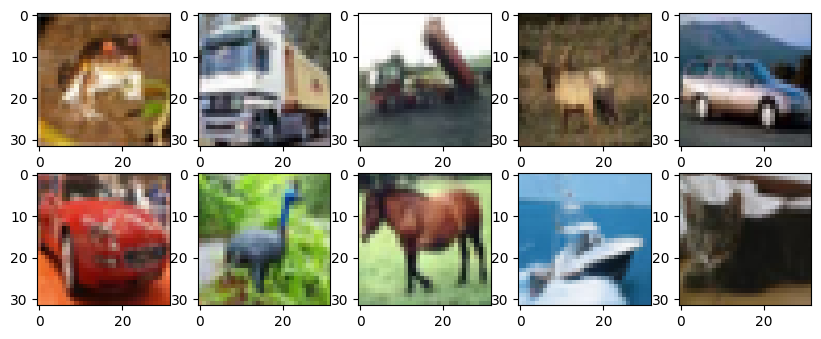

In [13]:
import cv2
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
for i in range(10):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[i]);
  #plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [16]:
model = Sequential()

model.add(Conv2D(32, (3,3),activation = 'relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

In [19]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [20]:
history = model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs = 10, batch_size = 64)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


782/782 [==============================] - 70s 88ms/step - loss: 1.6453 - accuracy: 0.3937 - val_loss: 1.3999 - val_accuracy: 0.4872
Epoch 2/10
782/782 [==============================] - 61s 77ms/step - loss: 1.3203 - accuracy: 0.5288 - val_loss: 1.2404 - val_accuracy: 0.5556
Epoch 3/10
782/782 [==============================] - 65s 83ms/step - loss: 1.1604 - accuracy: 0.5909 - val_loss: 1.1117 - val_accuracy: 0.6099
Epoch 4/10
782/782 [==============================] - 62s 79ms/step - loss: 1.0591 - accuracy: 0.6257 - val_loss: 1.1224 - val_accuracy: 0.6055
Epoch 5/10
782/782 [==============================] - 60s 76ms/step - loss: 0.9872 - accuracy: 0.6530 - val_loss: 1.0784 - val_accuracy: 0.6237
Epoch 6/10
782/782 [==============================] - 68s 87ms/step - loss: 0.9356 - accuracy: 0.6708 - val_loss: 1.0046 - val_accuracy: 0.6500
Epoch 7/10
782/782 [==============================] - 62s 79ms/step - loss: 0.8860 - accuracy: 0.6909 - val_loss: 0.9472 - val_accuracy: 0.6719
Epo

In [21]:
loss , acc = model.evaluate(x_test, y_test)
print(loss)
print(acc)

313/313 [==============================] - 4s 11ms/step - loss: 0.9822 - accuracy: 0.6690
0.9822017550468445
0.6690000295639038
